In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from loldle_solver.solver import Solver, calc_entropy


sns.set_theme()
plt.rcParams["figure.figsize"] = (20, 8)

In [2]:
df = Solver().df
df

name,gender,position,species,resource,range,region,release
str,str,list[str],list[str],str,list[str],list[str],i64
"""Qiyana""","""Female""","[""Middle""]","[""Human"", ""Magicborn""]","""Mana""","[""Melee""]","[""Ixtal""]",2019
"""Quinn""","""Female""","[""Top""]","[""Human""]","""Mana""","[""Ranged""]","[""Demacia""]",2013
"""Nunu & Willump…","""Male""","[""Jungle""]","[""Human"", ""Yeti""]","""Mana""","[""Melee""]","[""Freljord""]",2009
"""Warwick""","""Male""","[""Jungle"", ""Top""]","[""Chemically Altered"", ""Cyborg"", ""Human""]","""Mana""","[""Melee""]","[""Zaun""]",2009
"""Wukong""","""Male""","[""Jungle"", ""Top""]","[""Vastayan""]","""Mana""","[""Melee""]","[""Ionia""]",2011
…,…,…,…,…,…,…,…
"""Maokai""","""Male""","[""Jungle"", ""Support""]","[""Spirit""]","""Mana""","[""Melee""]","[""Shadow Isles""]",2011
"""Milio""","""Male""","[""Support""]","[""Human"", ""Magicborn""]","""Mana""","[""Ranged""]","[""Ixtal""]",2023
"""Mordekaiser""","""Male""","[""Top""]","[""Revenant""]","""Shield""","[""Melee""]","[""Noxus"", ""Shadow Isles""]",2010


In [21]:
def plot_col(data, ax, list_col=False, order=None):
    name = data.name.capitalize()
    if list_col:
        data = list(np.concatenate(data.to_numpy()))
    if order is not None:
        data = list(data)
        for value in order:
            data.remove(value)
        data = order + data
        data = [str(x) for x in data]

    _, counts = np.unique(data, return_counts=True, axis=0)
    probs = counts / counts.sum()
    entropy = calc_entropy(probs)

    sns.histplot(data=data, ax=ax)
    ax.set_title(f"{name} ({entropy:.2f})")

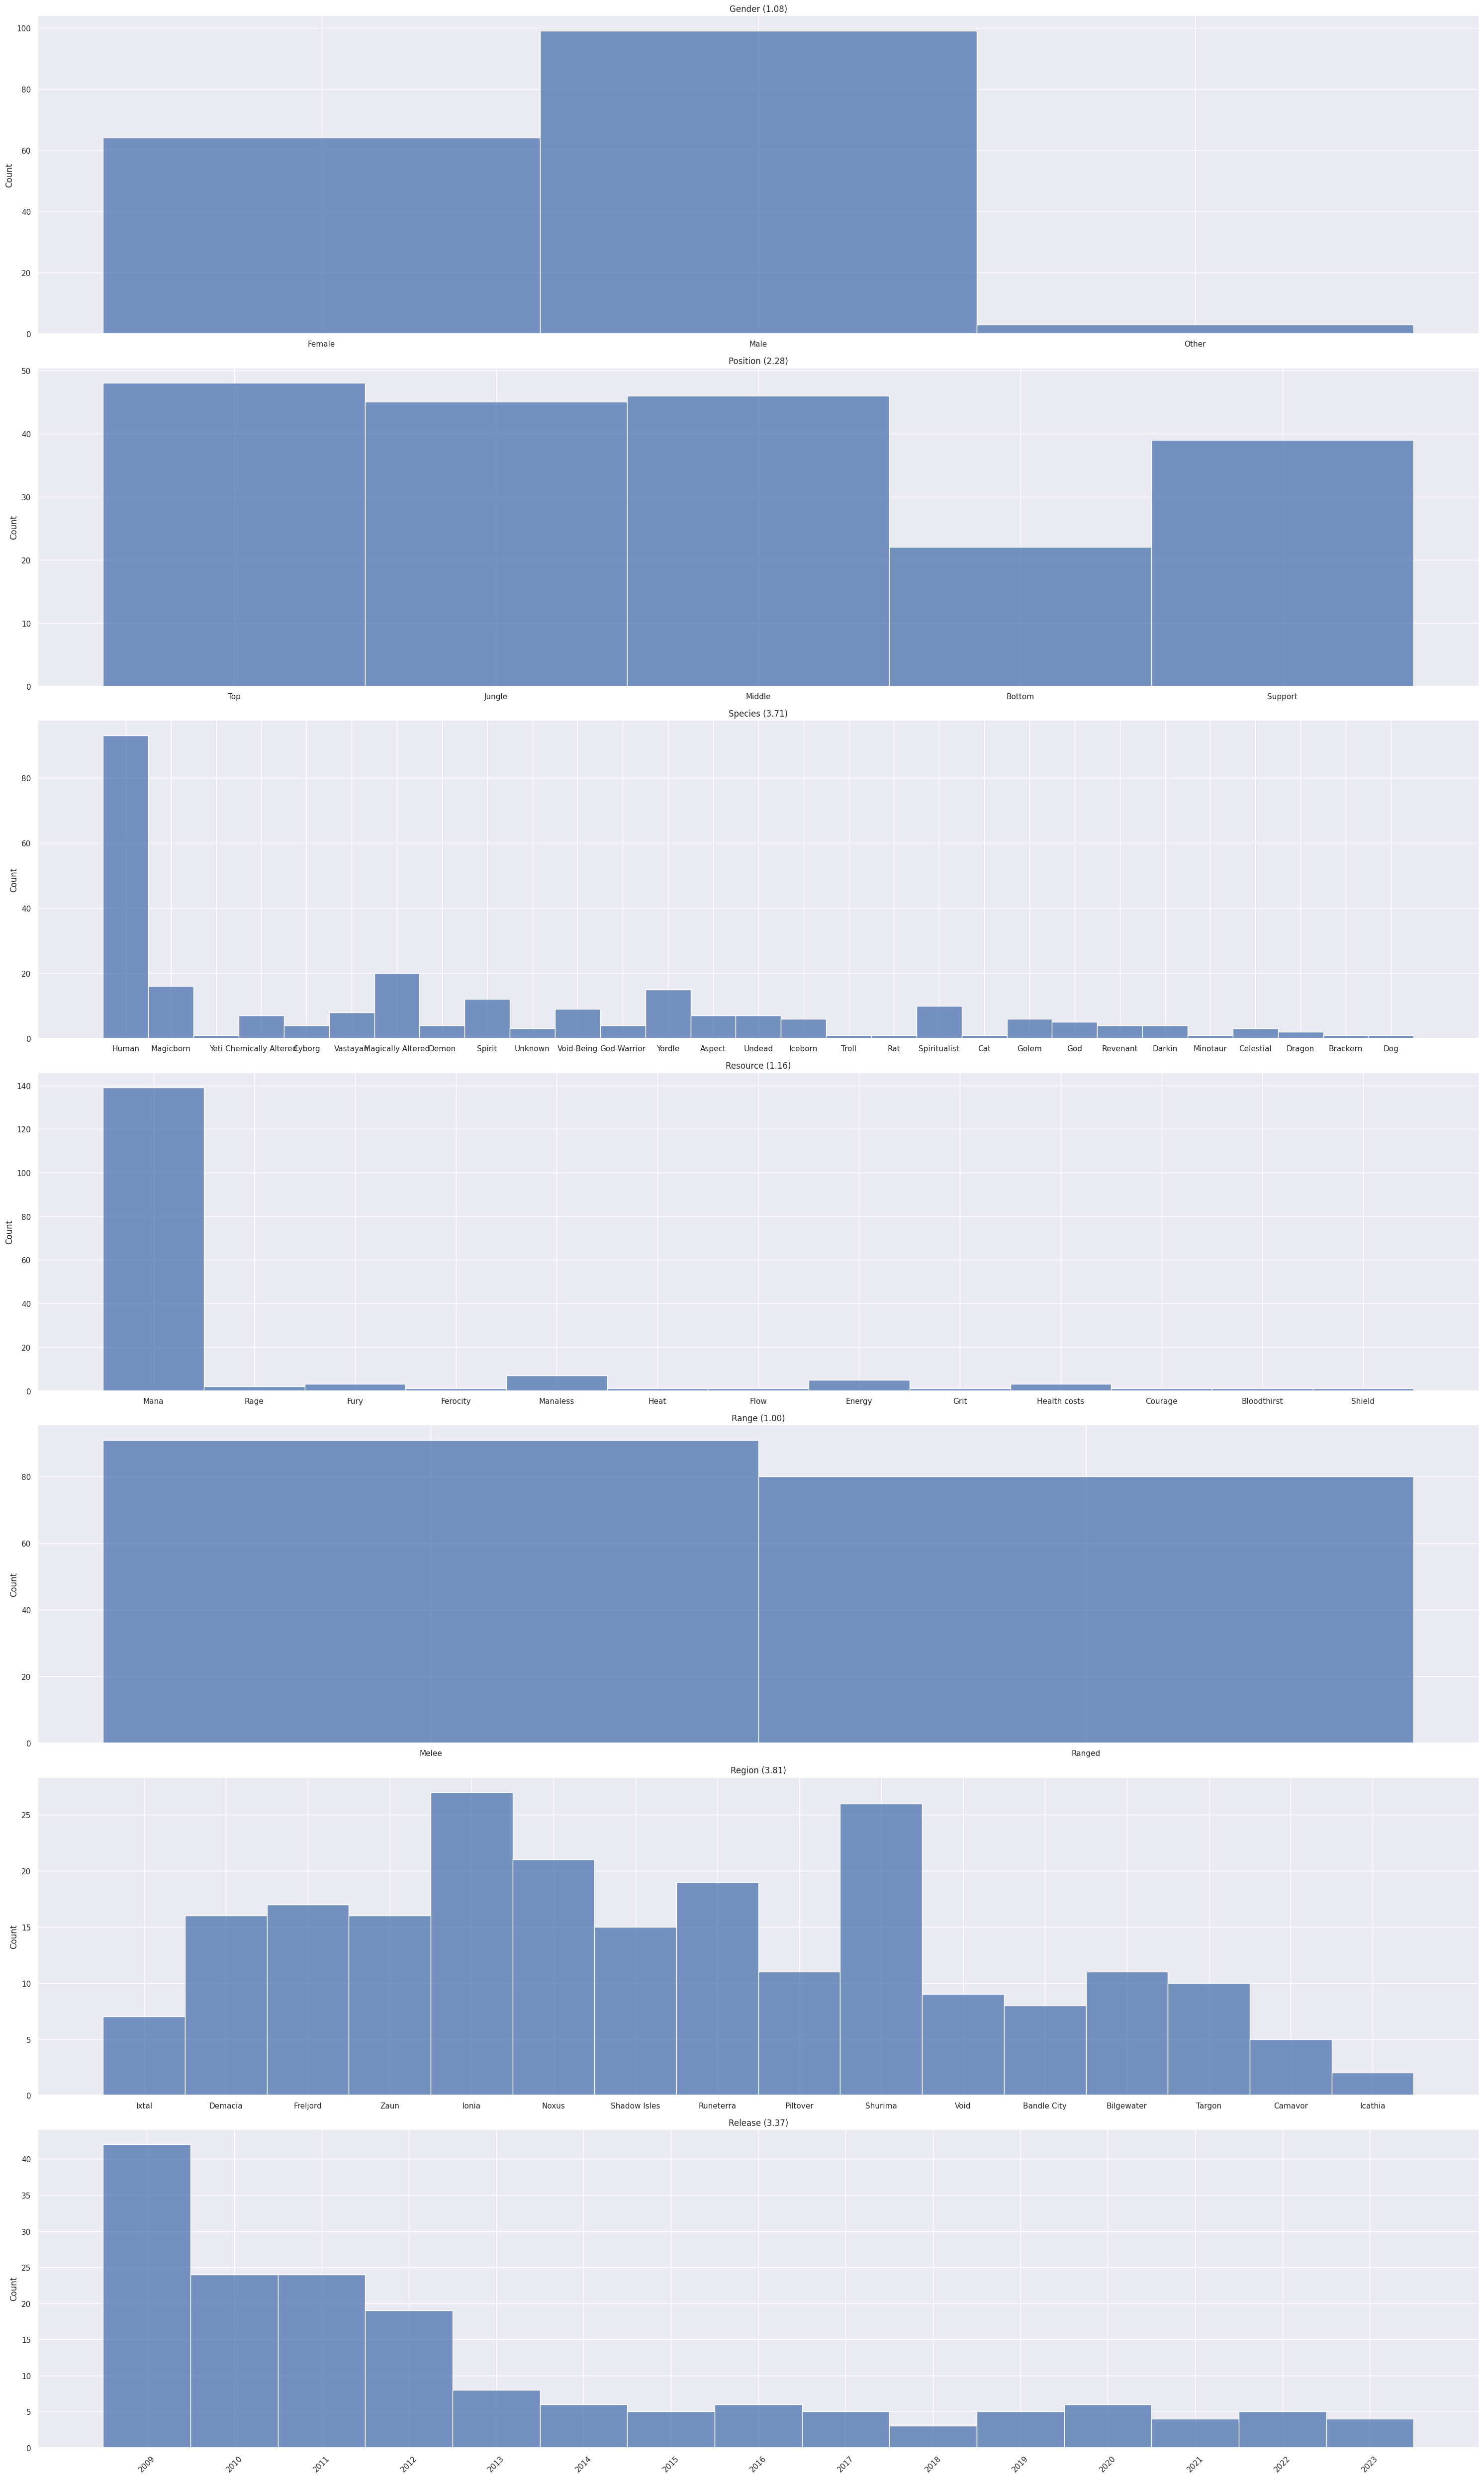

In [22]:
fig, axes = plt.subplots(7, 1, figsize=(30, 50))

plot_col(df["gender"], axes[0])
plot_col(
    df["position"],
    axes[1],
    list_col=True,
    order=["Top", "Jungle", "Middle", "Bottom", "Support"],
)
plot_col(df["species"], axes[2], list_col=True)
plot_col(df["resource"], axes[3])
plot_col(df["range"], axes[4], list_col=True)
plot_col(df["region"], axes[5], list_col=True)
plot_col(df["release"], axes[6], order=list(range(2009, 2024)))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
import polars as pl

df.filter(
    pl.col("range").list.contains("Melee")
    & pl.col("range").list.contains("Ranged")
)

name,gender,position,species,resource,range,region,release
str,str,list[str],list[str],str,list[str],list[str],i64
"""Elise""","""Female""","[""Jungle""]","[""Human"", ""Magically Altered""]","""Mana""","[""Melee"", ""Ranged""]","[""Noxus"", ""Shadow Isles""]",2012
"""Gnar""","""Male""","[""Top""]","[""Yordle""]","""Rage""","[""Melee"", ""Ranged""]","[""Freljord""]",2014
"""Jayce""","""Male""","[""Middle"", ""Top""]","[""Human""]","""Mana""","[""Melee"", ""Ranged""]","[""Piltover""]",2012
"""Kayle""","""Female""","[""Top""]","[""Aspect"", ""Human"", ""Magically Altered""]","""Mana""","[""Melee"", ""Ranged""]","[""Demacia"", ""Targon""]",2009
"""Nidalee""","""Female""","[""Jungle""]","[""Human"", ""Spiritualist""]","""Mana""","[""Melee"", ""Ranged""]","[""Ixtal""]",2009


In [ ]:
pdf = df.to_pandas()

In [50]:
pdf.release.value_counts().sort_index().cumsum()

release
2009     42
2010     66
2011     90
2012    109
2013    117
2014    123
2015    128
2016    134
2017    139
2018    142
2019    147
2020    153
2021    157
2022    162
2023    166
Name: count, dtype: int64

In [48]:
pdf.gender.value_counts()

gender
Male      99
Female    64
Other      3
Name: count, dtype: int64

In [49]:
import pandas as pd

pd.Series(np.concatenate(pdf.region)).value_counts()

Ionia           27
Shurima         26
Noxus           21
Runeterra       19
Freljord        17
Demacia         16
Zaun            16
Shadow Isles    15
Piltover        11
Bilgewater      11
Targon          10
Void             9
Bandle City      8
Ixtal            7
Camavor          5
Icathia          2
Name: count, dtype: int64

In [69]:
df.filter(
    (pl.col("gender") == "Male")
    & (pl.col("species").list.contains("Human"))
    & (pl.col("resource") == "Mana")
    & (pl.col("release") == 2011)
)

name,gender,position,species,resource,range,region,release
str,str,list[str],list[str],str,list[str],list[str],i64
"""Talon""","""Male""","[""Jungle"", ""Middle""]","[""Human""]","""Mana""","[""Melee""]","[""Noxus""]",2011
"""Yorick""","""Male""","[""Top""]","[""Human"", ""Magically Altered""]","""Mana""","[""Melee""]","[""Shadow Isles""]",2011
"""Jarvan IV""","""Male""","[""Jungle""]","[""Human""]","""Mana""","[""Melee""]","[""Demacia""]",2011
"""Graves""","""Male""","[""Jungle""]","[""Human""]","""Mana""","[""Ranged""]","[""Bilgewater""]",2011
"""Viktor""","""Male""","[""Middle""]","[""Cyborg"", ""Human""]","""Mana""","[""Ranged""]","[""Piltover"", ""Zaun""]",2011
"""Brand""","""Male""","[""Jungle"", ""Support""]","[""Human"", ""Magically Altered""]","""Mana""","[""Ranged""]","[""Freljord"", ""Runeterra""]",2011
